## Assignment 9 - A43

In [1]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generate some random data
np.random.seed(0)
x = np.random.rand(1000, 2) # 1000 samples, each with 2 features
y = np.random.randint(2, size=1000) # Binary target: 0 or 1

In [3]:
#Split the data into training and testing sets
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

In [4]:
#Define the Logistic Regression Model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_dim=2)])

# A single-layer neural network with 1 output neuron.
# sigmoid activation maps output to probability [0, 1].
# input_dim=2 because each sample has 2 features.

In [5]:
# Compile and train the model
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

# Uses Adam optimizer (adaptive learning rate).
# Loss: Binary cross-entropy (used for binary classification).
#from_logits=False: Output already passed through sigmoid, so don't apply another.
# Trained for 10 epochs.

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5242 - loss: 0.7132   
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 0.6965 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 0.7045 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.7030 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 0.7151 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5148 - loss: 0.7049
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.7081 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5059 - loss: 0.7039 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5232 - loss: 0.7068 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5167 - loss: 0.7041 


In [6]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss: ',loss)
print('Test Accuracy: ',accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4744 - loss: 0.7087  
Test Loss:  0.7075426578521729
Test Accuracy:  0.48500001430511475


In [7]:
# Use a Different Optimizer (SGD) =SGD is simpler but may converge slower. Useful to compare performance against Adam.

'''model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)
'''

"model.compile(\n    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),\n    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),\n    metrics=['accuracy']\n)\n"

In [8]:
# Change Activation to Tanh = tanh outputs between [-1, 1]. Used in some classification tasks, but less ideal than sigmoid for probabilities.
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='tanh', input_dim=2)
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)
'''

"model = tf.keras.Sequential([\n    tf.keras.layers.Dense(1, activation='tanh', input_dim=2)\n])\nmodel.compile(\n    optimizer='adam',\n    loss='mean_squared_error',\n    metrics=['accuracy']\n)\n"

In [9]:
# Add a Hidden Layer (MLP) = Adding non-linearity allows it to model more complex decision boundaries (good for non-linear data).

'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)'''

"model = tf.keras.Sequential([\n    tf.keras.layers.Dense(8, activation='relu', input_dim=2),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\nmodel.compile(\n    optimizer='adam',\n    loss='binary_crossentropy',\n    metrics=['accuracy']\n)"

In [10]:
# Convert to Multiclass Classification (3 Classes) = softmax is used for multi-class output. Categorical crossentropy is the correct loss function.

'''# Generate multiclass data
x = np.random.rand(1000, 2)
y = np.random.randint(3, size=1000)  # Labels: 0, 1, 2
y = tf.keras.utils.to_categorical(y, num_classes=3)  # One-hot encoding

x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

# Model for 3-class classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=2),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
'''

"# Generate multiclass data\nx = np.random.rand(1000, 2)\ny = np.random.randint(3, size=1000)  # Labels: 0, 1, 2\ny = tf.keras.utils.to_categorical(y, num_classes=3)  # One-hot encoding\n\nx_train, x_test = x[:800], x[800:]\ny_train, y_test = y[:800], y[800:]\n\n# Model for 3-class classification\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(8, activation='relu', input_dim=2),\n    tf.keras.layers.Dense(3, activation='softmax')\n])\nmodel.compile(\n    optimizer='adam',\n    loss='categorical_crossentropy',\n    metrics=['accuracy']\n)\n"

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5525 - loss: 0.6947 - val_accuracy: 0.4688 - val_loss: 0.7232
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5232 - loss: 0.6988 - val_accuracy: 0.4688 - val_loss: 0.7230
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5365 - loss: 0.6948 - val_accuracy: 0.4688 - val_loss: 0.7227
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5268 - loss: 0.7011 - val_accuracy: 0.4688 - val_loss: 0.7224
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 0.6999 - val_accuracy: 0.4750 - val_loss: 0.7221
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5340 - loss: 0.6962 - val_accuracy: 0.4688 - val_loss: 0.7221
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5299 - loss: 0.6990 - val_accuracy: 0.4688 - val_loss: 0.7219
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5153 - loss: 0.7022 - val_accuracy: 0.4688 - val_loss:

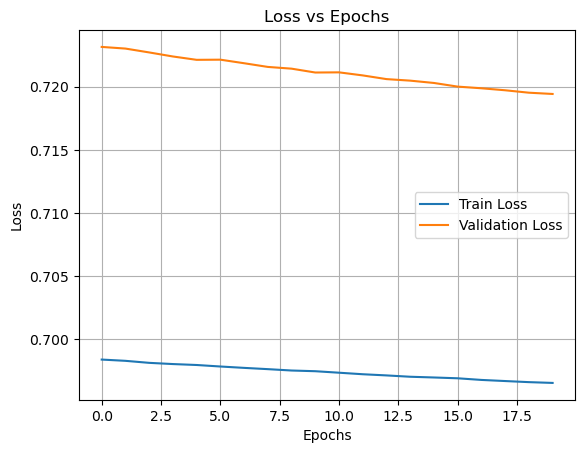

In [12]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Plotting
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.title('Loss vs Epochs')
plt.legend()
plt.show()